In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


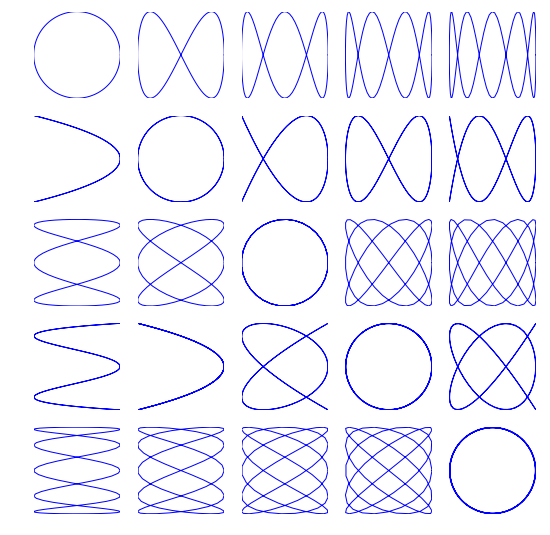

In [3]:
theta = linspace(0, 2 * np.pi, 100)

fig = figure('Lissajous', figsize = (9,9))

for i in range(1, 6):
    for j in range(1,6):
        ax = fig.add_subplot(5, 5, 5*(i-1) + j)
        ax.plot(np.cos(i*theta), np.sin(j*theta))
        ax.axis('off')
savefig('liss.png')
savefig('liss.pdf')
show()

In [141]:
%pylab
import matplotlib.animation as animation

class circulo:
    # 
    def __init__(self, rad = 1., lc = 'k', style = '-'):
        self.radius = rad
        
        self.color = lc
        self.style = style
        
        self.theta = np.linspace(0, 2*np.pi, 100)
        
        self.xs = rad * np.cos(self.theta)
        self.ys = rad * np.sin(self.theta)
        
    def resize(self, radius):
        self.radius = radius
        self.xs = radius * np.cos(self.theta)
        self.ys = radius * np.sin(self.theta)
        

def r(t, omega = np.pi):
    return square_size * np.cos(1. * omega * t) ** 2
    
omega = 1.
r0 = 100.
t0 = 0.
square_size = 100

fig2 = figure('glow', figsize = (8, 8))

#lims = [-square_size, square_size]
#ticks = np.linspace(-square_size, square_size, 3)

ax = fig2.add_subplot(111, xlim = lims, ylim = lims, xticks = ticks, yticks = ticks,
                      title = "Circulo con radio cambiante")

for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
line, = ax.plot([], [], lw = 1.5)

texto_radio = ax.text(1, 1, "", horizontalalignment = 'right', verticalalignment = 'top', transform = ax.transAxes)
texto_tiempo = ax.text(0, 1, "", horizontalalignment = 'left', verticalalignment = 'top', transform = ax.transAxes)


def init():
    circle = circulo(r0)
    line.set_data([],[])
    texto_radio.set_text("")
    texto_tiempo.set_text("")
    
    return (line, texto_radio, texto_tiempo)

framesps = 30
video_time = 8

def animate(i):
    t = i * 1. / framesps
    radius = r(t, 1.)
    circle.resize(radius)
    line.set_data(circle.xs, circle.ys)
    texto_radio.set_text("Radio = %.2f"%(radius))
    texto_tiempo.set_text("Tiempo = %.3fs"%(t))
    
    return (line, texto_radio, texto_tiempo)


anim = animation.FuncAnimation(fig2, animate, frames = framesps * video_time, interval = 1000. / framesps, blit = True, init_func = init)
anim.save('glow.mp4', fps = framesps)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [132]:
print lims
print ticks

[-100, 100]
[-100.    0.  100.]
